In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
insurance_dataset=pd.read_csv('insurance.csv')

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [6]:
insurance_dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [12]:
insurance_dataset.groupby('children').mean()


,age,bmi,expenses
children,,,
0,38.444251,30.553484,12365.975767
1,39.453704,30.623765,12731.171821
2,39.445833,30.979167,15073.564000
3,41.566879,30.688535,15355.318535
4,39.000000,31.388000,13850.656800
5,35.611111,29.600000,8786.035556


In [11]:
insurance_dataset.groupby('sex').mean()

,age,bmi,children,expenses
sex,,,,
female,39.503021,30.379758,1.074018,12569.578897
male,38.917160,30.945266,1.115385,13956.751420


<Figure size 432x432 with 0 Axes>

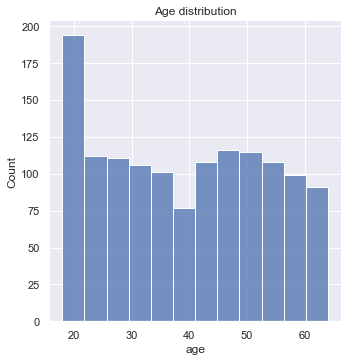

In [13]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()


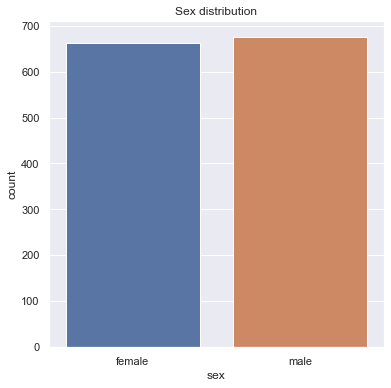

In [14]:
#gneder column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex distribution')
plt.show()

In [15]:
insurance_dataset['bmi'].value_counts()

27.6    17
33.3    17
28.9    16
32.3    15
29.8    14
        ..
41.7     1
45.3     1
47.6     1
17.9     1
40.7     1
Name: bmi, Length: 275, dtype: int64

<Figure size 432x432 with 0 Axes>

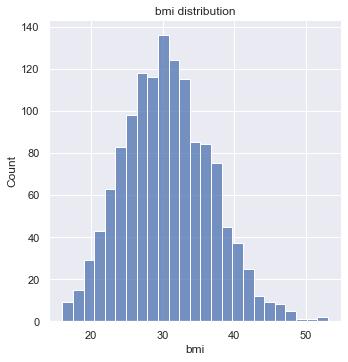

In [16]:
plt.figure(figsize=(6,6))
sns.displot(x='bmi',data=insurance_dataset)
plt.title('bmi distribution')
plt.show()

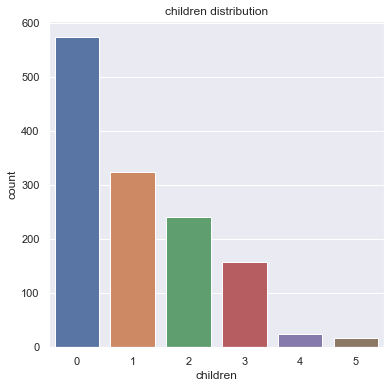

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children distribution')
plt.show()

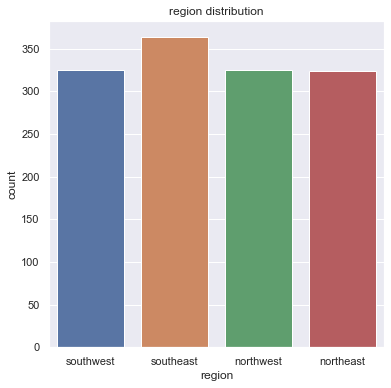

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region distribution')
plt.show()

In [19]:
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_dataset.replace({'region':{'southeast':3,'northwest':2,'southwest':1,'northeast':0}},inplace=True)

In [21]:
insurance_dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,1,16884.92
1,18,0,33.8,1,1,3,1725.55
2,28,0,33.0,3,1,3,4449.46
3,33,0,22.7,0,1,2,21984.47
4,32,0,28.9,0,1,2,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,1,2,10600.55
1334,18,1,31.9,0,1,0,2205.98
1335,18,1,36.9,0,1,3,1629.83
1336,21,1,25.8,0,1,1,2007.95


In [22]:
X=insurance_dataset.drop('expenses',axis=1)
y=insurance_dataset['expenses']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
xgb=XGBRegressor()

In [25]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [26]:
X_train_pred=xgb.predict(X_train)
error=metrics.r2_score(X_train_pred,y_train)
error

0.9960975630561035

In [27]:
X_test_pred=xgb.predict(X_test)
error1=metrics.r2_score(X_test_pred,y_test)
error1

0.7723838291444923

In [28]:
def data(input_data):
    input_data_numpy=np.asarray(input_data)
    input_data_reshape=input_data_numpy.reshape(1,-1)
    prediction=xgb.predict(input_data_reshape)
    return prediction

In [33]:
data([X.iloc[0]])

array([18042.414], dtype=float32)